---
Introduction to the Problem
---

Nowadays credit card frauds are drastically increasing in number as compared to earlier times. Criminals  are using fake identity and various technologies to trap the users and get the money out of them. Therefore, it is very essential to find a solution to these types of frauds. In this project, we will design a model to detect the fraud  activity in credit card transactions. 
First, we will collect the credit card usage data-set by users and classify it as trained and  testing dataset using a random forest algorithm and decision  trees. Using this algorithm, we can also augment the  accuracy of the result data. The performance of the techniques is gauged  based on accuracy, precision, and correlation matrix.

#### Librairies used in this project 

In [1]:
import numpy as np #NumPy : For simple arrays. import numpy as np

import pandas as pd #Pandas : For reading the dataset, and getting info

 
import sklearn #SciKit-Learn: for pre-processing and modeling

 
import seaborn as sns #Seaborn : For plotting and representing confusion matrix colour format.
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

---
The Data Set
---

In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. The dataset contains 284,807 transactions, of which 492 are fraudulent


In [15]:
df=pd.read_csv("creditcard.csv")
fraud=df.Time[df.Class == 1]
normal=df.Time[df.Class == 0]

In [16]:
print ("Fraudulent transactions : \n",fraud.describe())
print("---------------------------------------------------------------")
print ("Normal transactions :\n",normal.describe())


Fraudulent transactions : 
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64
---------------------------------------------------------------
Normal transactions :
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


In [17]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- The features V1, V2, ..., V28 are the result of a PCA transformation. To protect confidentiality, background information on these features is not available.
- The Time feature contains the time elapsed since the first transaction
- The Amount feature contains the transaction amount. 
- The response variable, Class, is 1 in the case of fraud, and 0 otherwise.

### An Imbalanced Data ...

In [18]:
print("The Data set has :",fraud.count(),"transactions that are fraud")
print("The Data set has :",normal.count(),"transactions that are considered as normal")

print("Thus, only ",fraud.count()/(fraud.count()+normal.count())*100,"% of transactions are labelled as fraudulent")

The Data set has : 492 transactions that are fraud
The Data set has : 284315 transactions that are considered as normal
Thus, only  0.1727485630620034 % of transactions are labelled as fraudulent


Such heavy imbalance. Indeed, only few data belong to the data usually pose serious problems in classification.
Without underminig their significance, we'll try ouyt just simple modelling first, to see if we can stil have a good classification
Class imbalance is very common in real life scenarios, and needs to be handled carefully for effective classification.

However, there are quite few ways to curb this imbalance such as
* Undersampling / Oversampling / Combining the two



---
Data Set Exploration : Closer Look to The Variables
---

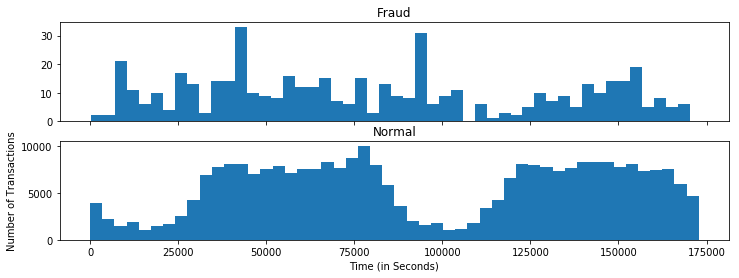

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

When we plot the number of transactions that occurs during time, we can notice thatfraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time. 

Text(0, 0.5, 'Probability Density')

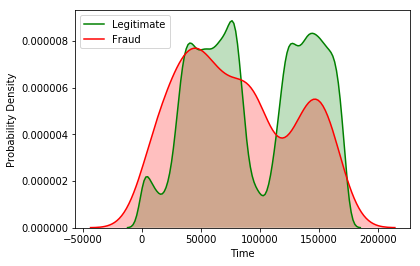

In [20]:
fraud1=df.Time[df.Class == 1]
legitimate1=df.Time[df.Class == 0]

# library and dataset
import seaborn as sns
 
# plot of 2 variables
p1=sns.kdeplot(legitimate1,shade=True, color="g",label="Legitimate")
p1=sns.kdeplot(fraud1, shade=True, color="r",label="Fraud")
#sns.plt.show()
plt.xlabel('Time') 
plt.ylabel('Probability Density') 



---
Now let's see if the transaction amount differs between the two types.


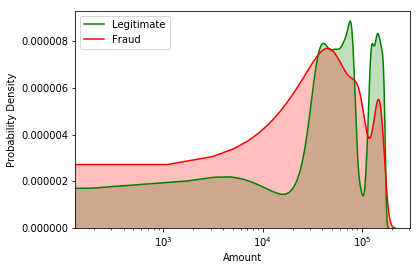

In [21]:
# plot of 2 variables
p1=sns.kdeplot(normal, shade=True, color="g", label="Legitimate")
p1=sns.kdeplot(fraud, shade=True, color="r", label="Fraud")
plt.xlabel('Amount') 
plt.ylabel('Probability Density') 
plt.xscale('log')

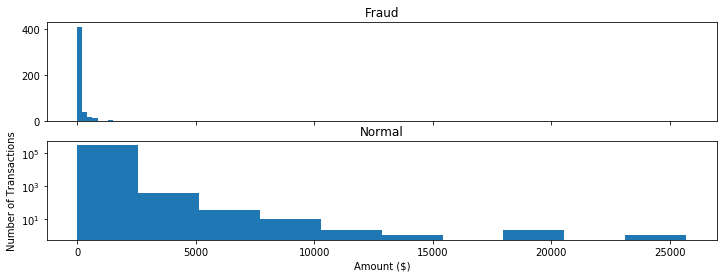

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 10

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Here, we can argue that fraudulent transactions are small amounts, less than 100.

----
Let's now compare Time with Amount.

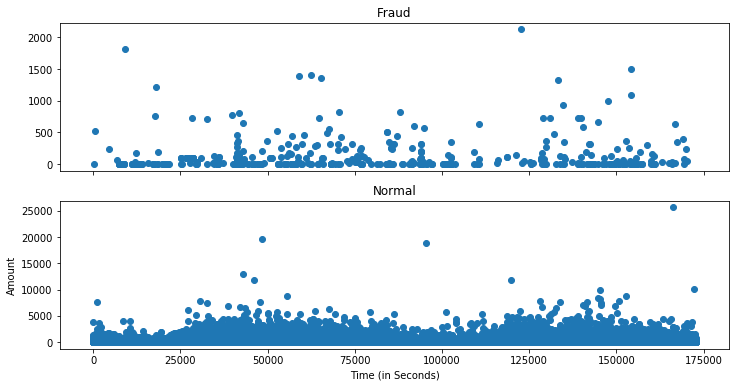

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

We can notice here that we learn nothing new. Whereas the amount seems to determine the type of transaction we have ( small when it's fraudulent , huge or average otherwise, here we can notice that there's nothing too meaningful in that plot.

---
4.Data Cleaning and Preprocessing
---

We need to make the data set ready for modelling. For that purpose, we are going to clean the data by removing unrelated variables, unusal entries, the columns/rows with too missing values.

In [24]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Our data doesn't have missing values

-----
We are going to split our data into training and testing sets.
During training, we let the model ‘see’ the answers, in this case thetype pf transaction, so it can learn how to predict the class ( fraudulent / normal ) from the features. We expect there to be some relationship between all the features and the target value, and the model’s job is to learn this relationship during training. 

Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features (not the answers)! Because we do have the actual answers for the test set, we can compare these predictions to the true value to judge how accurate the model is. 

Generally, when training a model, we randomly split the data into training and testing sets to get a representation of all data points (if we trained on the first nine months of the year and then used the final three months for prediction, our algorithm would not perform well because it has not seen any data from those last three months.)

Here, we set the random state to 42 which means the results will be the same each time I run the split for reproducible results.

In [25]:
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Response : What we want to predict
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
del X, y

---
Decision Tree model  and Performance metrics
---

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

###### Gini index or Entropy ?

There are three commonly used impurity measures used in binary decision trees: Entropy, Gini index, and Classification Error.
In ths project, we will mainly focus on :
- Entropy (a way to measure impurity)
- Gini index (a criterion to minimize the probability of misclassification)

----

- Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.
- Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.It means an attribute with lower gini index should be preferred.
Sklearn supports “gini” criteria for Gini Index and by default, it takes “gini” value.

In [27]:
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [28]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    #print("Predicted values:") 
    #print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix:\n", 
        confusion_matrix(y_test, y_pred))
    print("\n")

      
    print ("Accuracy :", 
    accuracy_score(y_test,y_pred)*100)
    print("\n")

      
    print("Report :\n", 
    classification_report(y_test, y_pred))
    print("\n")


In [29]:
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
# Operational Phase 
print("Results Using Gini Index:") 
print("\n")
      
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 


Results Using Gini Index:


Confusion Matrix:
 [[56843    21]
 [   23    75]]


Accuracy : 99.92275552122467


Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.77      0.77        98

    accuracy                           1.00     56962
   macro avg       0.89      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962





That looks pretty good! Our model has learned how to predict fradulent transactions with <b>99.92% accuracy </b> using Gini impurity measure
If we take a closer look to the confusion matrix structured as below :

We can notice that there are:
- 56772 values have been predicted as  <b> True Positives </b>, meaning that out of 56962 values, 56772 have been predicted as fradulent/normal and actually are.
- Also, 21 values have been predicted as positive, whereas they aren't.
(<b>False postives</b>)
-  The Model's precision, that shows how out of all the positive classes we have predicted correctly, which one are actually positive. It's calculated using this formula ( TP / ( TP +FP )) and is 78%.

In [30]:
 # Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 

Confusion Matrix:
 [[56845    19]
 [   18    80]]


Accuracy : 99.93504441557529


Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962





We have reached <b> 99.93% accuracy </b> using Entropy measure.
Plus, we have less False Positives ( 19 ) and consequently, more precision ( 81 % )

So should we you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

## Random Forest Model

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# Function to make predictions 
def RF_prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    #print("Predicted values:") 
    #print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy_RF(y_test, y_pred): 
      
    print("Confusion Matrix:\n", 
        confusion_matrix(y_test, y_pred))
    print("\n")

      
    print ("Accuracy :", 
    accuracy_score(y_test,y_pred)*100)
    print("\n")

      
    print("Report :\n", 
    classification_report(y_test, y_pred))
    print("\n")


In [33]:
y_pred_RF = RF_prediction(X_test, rf) 
cal_accuracy(y_test, y_pred_RF) 


Confusion Matrix:
 [[56858     6]
 [   22    76]]


Accuracy : 99.95084442259751


Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.78      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962





Using a random forest model, which is combination of decisions trees, we have a higher accuracy, <b>99,96%</b> and a better precision, <b> 92%</b>.
But can we still optimize our model ?

---
Tunning Hyperparameters of the Random Forest Model
---



------------------
While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set before training. In the case of a random forest, hyperparameters include the <b> number of decision trees </b> in the forest and the <b> number of features considered by each tree </b> when splitting a node. 

--------------------------------
The parameters of a random forest are the variables and thresholds used to split each node learned during training.


### Random Search Cross Validation

Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter. Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

First, let's see what are the parameters used by default by scikit-learn

In [34]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


 As said previously, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features).  Let's try out a wide range of values and see what works!
 We will try adjusting the following set of hyperparameters:

   * n_estimators = number of trees in the foreset
   * max_features = max number of features considered for splitting a node
   * max_depth = max number of levels in each decision tree
   * min_samples_split = min number of data points placed in a node before the node is split
   * min_samples_leaf = min number of data points allowed in a leaf node
   * bootstrap = method for sampling data points (with or without replacement)

<b> n_estimators </b> represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

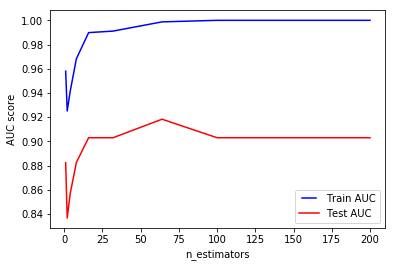

In [35]:
from sklearn.metrics import roc_curve, auc
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)   
   train_pred = rf.predict(X_train)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We can see that for our data, we can stop at 32 trees as increasing the number of trees decreases the test performance.

-----
<b>max_depth</b> represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.

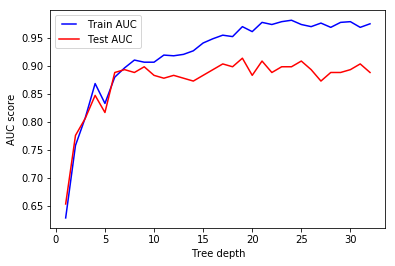

In [36]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)   
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   y_pred = rf.predict(X_test)  
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We see that the model overfits for large depth values. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data.

____
Let's create a parameter grid to sample from during fitting


In [37]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


------
On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings! 
However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


We can view the best parameters from fitting the random search:

In [ ]:
rf_random.best_params_

To determine if random search yielded a better model, we compare the base model with the best random search model.

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
print(' We have an improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

---
Conclusion
---

We were able to accurately identify fraudulent credit card transactions using either decision trees model or a random forest model.In our case, only a few preprocessing steps were necessary before constructing predictive models, because the data had no missing values and unrelevant data. Even if it was heavily imbalanced, we have reached correct accuracy scores.
To improve our random forest model, we searched over a grid of hyperparameters and compared performance with based model. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.
